# Skin Lesion Prediction - Feature Engineering
Feature Creation and Feature Engineering is one of the most important tasks in machine learning, having a huge impact on model performance.
Features can be changed or new features can be created from existing features.


### Some guidelines for feature transformation:

#### Imputing
    Some algorithms are very sensitive to missing values. Therefore, imputing allows for filling of empty       fields based on its value distribution
####  Imputed time-series quantization
    Time series often contain streams with measurements at different timestamps. Therefore, it is beneficial     to quantize measurements to a common “heart beat” and impute the corresponding values. This can be done     by sampling from the source time series distributions on the respective quantized time steps 
#### Scaling / Normalizing / Centering
    Some algorithms are very sensitive differences in value ranges for individual fields. Therefore, it is       best practice to center data around zero and scale values to a standard deviation of one   
#### Filtering
    Sometimes imputing values doesn’t perform well, therefore deletion of low quality records is a better       strategy  
####  Discretizing
     Continuous fields might confuse the model, e.g. a discrete set of age ranges sometimes performs better      than continuous values, especially on smaller amounts of data and with simpler models   
    

### Some guidelines for feature creation:

#### One-hot-encoding
    Categorical integer features should be transformed into “one-hot” vectors. In relational terms this         results in addition of additional columns –one columns for each distinct category
#### Time-to-Frequency transformation
    Time-series (and sometimes also sequence data) is recorded in the time domain but can easily transformed     into the frequency domain e.g. using FFT (Fast Fourier Transformation)   
#### Month-From-Date
    Creating an additional feature containing the month independentfrom data captures seasonal aspects.         Sometimes further discretization in to quarters helps as well  
####  Aggregate-on-Target
    Simply aggregating fields the target variable (or even other fields) can improve performance, e.g. count     number of data points per ZIP codeor take the median of all values by geographical region  
    
    
    

In [2]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
skindf=pd.read_csv('skindf.csv')
skindf.head().T

,0,1,2,3,4
pixel0000,192,25,192,38,158
pixel0001,153,14,138,19,113
pixel0002,193,30,153,30,139
pixel0003,195,68,200,95,194
pixel0004,155,48,145,59,144
...,...,...,...,...,...
pixel2351,177,27,117,15,92
label,2,2,2,2,2
sex,0,0,0,0,0
localization,0,0,0,0,1


#### Split features and targets and make copy of df

In [4]:
#Split features and targets and make copy of df
X = skindf.drop('label',axis=1).copy() 
y = skindf['label'].copy()

In [5]:
#Check the shape of the features and targets
print(X.shape)

(10015, 2355)


In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel0000,10015.0,181.056415,59.746698,0.0,158.0,198.0,224.0,255.0
pixel0001,10015.0,131.728407,45.043473,0.0,117.0,141.0,159.0,246.0
pixel0002,10015.0,141.240240,48.672670,0.0,123.0,151.0,172.0,255.0
pixel0003,10015.0,187.274488,54.021274,0.0,165.0,201.0,226.0,254.0
pixel0004,10015.0,137.089466,41.138096,0.0,122.0,144.0,162.0,246.0
...,...,...,...,...,...,...,...,...
pixel2350,10015.0,127.871193,46.453818,0.0,113.0,138.0,156.0,249.0
pixel2351,10015.0,133.144483,49.060028,0.0,115.0,142.0,163.0,254.0
sex,10015.0,0.465901,0.510143,0.0,0.0,0.0,1.0,2.0
localization,10015.0,5.776635,2.966381,0.0,3.0,6.0,9.0,14.0


In [7]:
print(y.shape)

(10015,)


In [8]:
y.describe()

count    10015.000000
mean         3.720919
std          1.347499
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: label, dtype: float64

### There are 7 possible labels.
#### From the dataset provider:

* 0: nv - Melanocytic nevi
* 1: mel - Melanoma
* 2: bkl - Benign keratosis-like lesions
* 3: bcc - Basal cell carcinoma
* 4: akiec - Actinic keratoses and intraepithelial carcinoma / Bowen's disease
* 5: vasc - Vascular lesions
* 6: df - Dermatofibroma

In [9]:
#Check for imbalanced data
y.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

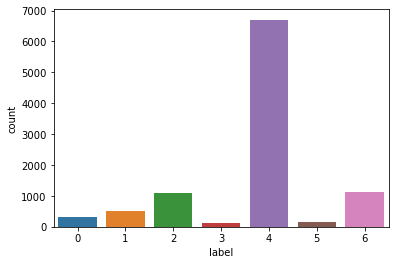

In [10]:
#!pip install seaborn
import seaborn as sns

#Plot the targets distribution
sns.countplot(x='label', data=skindf)

### View the labels as a scatter plot

In [11]:
X = np.array(X)
print(X.shape)

(10015, 2355)


In [12]:
#!pip install imblearn
#import imblearn
from collections import Counter
#print(imblearn.__version__)
counter = Counter(y)
print(counter)

Counter({4: 6705, 6: 1113, 2: 1099, 1: 514, 0: 327, 5: 142, 3: 115})


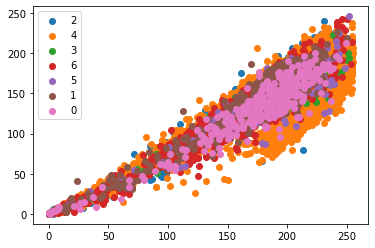

In [13]:
from numpy import where
from matplotlib import pyplot

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Feature Transformation:

#### Imputing
Some algorithms are very sensitive to missing values. Therefore, imputing allows for filling of empty fields based on its value distribution.

NA. Missing values filled in during EDA so no missing values.
#### Imputed time-series quantization
Time series often contain streams with measurements at different timestamps. Therefore, it is beneficial to quantize measurements to a common “heart beat” and impute the corresponding values. This can be done by sampling from the source time series distributions on the respective quantized time steps.

NA, Data is not time series.
#### Filtering
Sometimes imputing values doesn’t perform well, therefore deletion of low quality records is a better strategy.

NA. Cleaned in ETL


## Dealing with Imbalanced Data

#### From viewing a previous plot and the value counts we can see that we have an imblanced dataset

#### Let's have a look at the class distributions again

Class=2, n=1099 (10.974%)
Class=4, n=6705 (66.950%)
Class=3, n=115 (1.148%)
Class=6, n=1113 (11.113%)
Class=5, n=142 (1.418%)
Class=1, n=514 (5.132%)
Class=0, n=327 (3.265%)


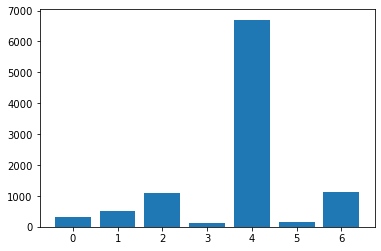

In [14]:
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Using the Default SMOTE Strategy to oversample all classes to the number of examples in the majority class

Class=2, n=6705 (14.286%)
Class=4, n=6705 (14.286%)
Class=3, n=6705 (14.286%)
Class=6, n=6705 (14.286%)
Class=5, n=6705 (14.286%)
Class=1, n=6705 (14.286%)
Class=0, n=6705 (14.286%)


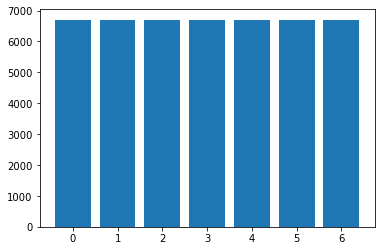

In [16]:
#Default SMOTE Strategy to oversample all classes to the number of examples in the majority class
#!pip install imblearn
#!pip install delayed
from imblearn.over_sampling import SMOTE
#import sklearn.utils.fixes
from imblearn.over_sampling import SMOTE


# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

#### Scaling / Normalizing / Centering
Some algorithms are very sensitive differences in value ranges for individual fields. Therefore, it is best practice to center data around zero and scale values to a standard deviation of one.

Note: Fitting must be done on the training data to avoid 'leaking' from test data.


## Scaling and PCA

In [17]:
# Using 90% for training and 10% for testing
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=0)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train.shape

(42241, 2355)

In [19]:
X_test.shape

(4694, 2355)

## Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PCA

The code below has .95 for the number of components parameter. Scikit-learn will choose the minimum number of principal components required to retain 95% of the variance.


In [21]:
from sklearn.decomposition import PCA

#Make an instance of the Model
pca = PCA(.95)

In [22]:
#Fit PCA on training set
pca.fit(X_train)

PCA(n_components=0.95)

### Display the number of componenets chosen from PCA

In [23]:
pca.n_components_

58

### Apply the mapping (transform) to both the training set and the test set.

In [24]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [25]:
X_test.shape

(4694, 58)

In [26]:
X_train.shape

(42241, 58)